### Comparing llm and human paths

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
import seaborn as sns

## Path with no memory

1. Does the llm take on average more steps than the human?

In [86]:
# load the data data/llm_paths_all_gpt4omini_no_memory.tsv
llm_paths_all_gpt4omini_no_memory = pd.read_csv('data/llm_paths_all_gpt4omini_no_memory.tsv', sep='\t')

# filter out the rows with 0 steps
llm_paths_all_gpt4omini_no_memory = llm_paths_all_gpt4omini_no_memory[llm_paths_all_gpt4omini_no_memory['steps'] > 0]
# describe the data
llm_paths_all_gpt4omini_no_memory['steps'].describe()

In [6]:
# load the data data/paths_finished_unique.tsv
paths_finished = pd.read_csv('data/paths_finished_unique.tsv', sep='\t')

# get the number of steps in the finished paths
paths_finished['path_length'] = paths_finished['path'].apply(lambda x: len(x.split(';')) - 1)
paths_finished['path_length'].describe()

count    28718.000000
mean         5.672749
std          5.017178
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        434.000000
Name: path_length, dtype: float64

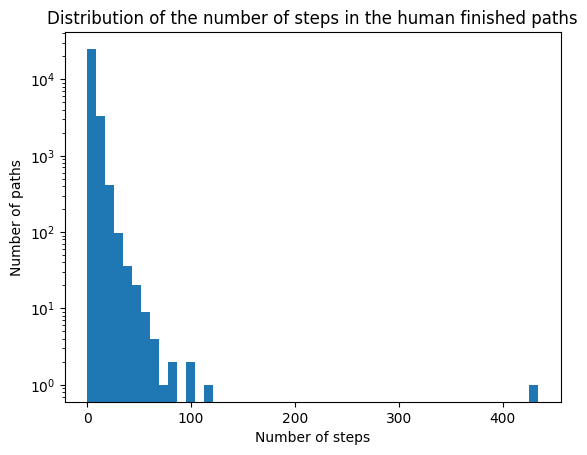

In [41]:
# plot the distribution of the number of steps in the finished paths
llm_paths_all_gpt4omini_no_memory['path_length'] = llm_paths_all_gpt4omini_no_memory['path'].apply(lambda x: len(x.split(';')) - 1)
paths_finished['path_length'].hist(bins=50)
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.title('Distribution of the number of steps in the human finished paths')
plt.grid(False)
plt.yscale('log')


In [87]:
llm_paths_all_gpt4omini_no_memory['path_length'].hist(color='orange', bins=50)
plt.xlim(0, paths_finished['path_length'].max())
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.title('Distribution of the number of steps in the paths \n finished by LLM GPT-4-o mini (no memory)')
plt.grid(False)
plt.yscale('log')

count    14527.000000
mean         3.661527
std          1.612817
min          1.000000
25%          3.000000
50%          3.000000
75%          5.000000
max         16.000000
Name: steps, dtype: float64

In [88]:
# take only the path_id that are in the 2 datasets
# create a mask using the past_id column
mask = paths_finished['path_id'].isin(llm_paths_all_gpt4omini_no_memory['path_id'])
paths_finished_filtered = paths_finished[mask]


# get the number of steps in the filtered paths
paths_finished_filtered['path_length'] = paths_finished_filtered['path'].apply(lambda x: len(x.split(';')) - 1)
paths_finished_filtered['path_length'].describe()


count    28718.000000
mean         5.672749
std          5.017178
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        434.000000
Name: path_length, dtype: float64

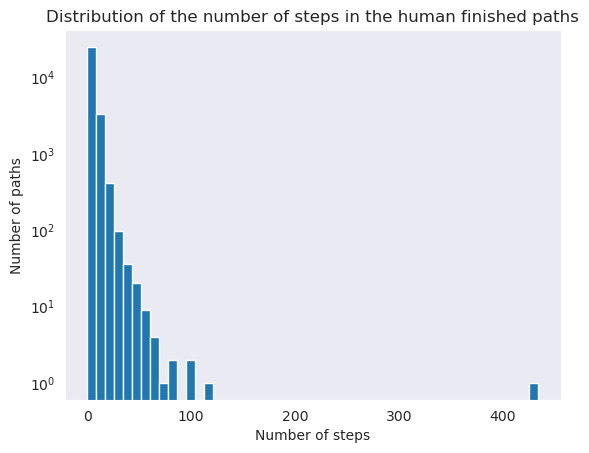

In [89]:
# plot the distribution of the number of steps in the filtered paths
sns.histplot(paths_finished_filtered['path_length'], bins=50)
plt.title('Distribution of the number of steps in the human finished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.yscale('log')

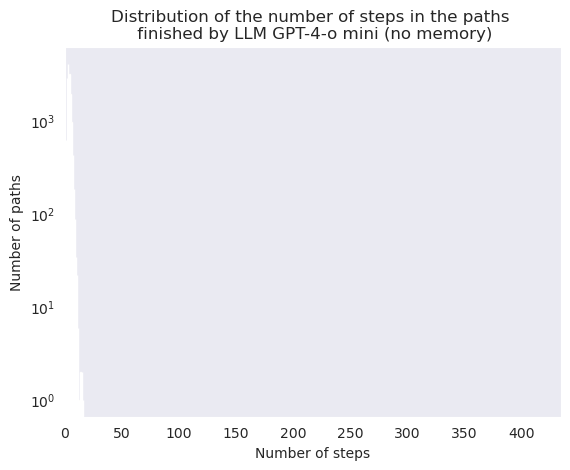

In [90]:
# get the 98th percentile of the number of steps in the filtered paths
percentile_99 = np.percentile(paths_finished_filtered['path_length'], 99)
# plot the distribution of the number of steps in the filtered paths that are less than the 98th percentile
paths_finished_filtered_lt_99 = paths_finished_filtered[paths_finished_filtered['path_length'] < percentile_99]
sns.histplot(paths_finished_filtered_lt_99['path_length'], bins=50)
plt.title('Distribution of the number of steps in the filtered paths < 98th percentile')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

In [91]:
# compare the distribution of the number of steps in the finished paths filtered 99 percentile and the LLM paths
paths_finished_filtered_lt_99['path_length'].hist(bins=50, alpha=0.5, label='Human paths < 99th percentile')
llm_paths_all_gpt4omini_no_memory['path_length'].hist(bins=50, alpha=0.5, label='GPT-4-o mini paths (no memory)')
plt.title('Distribution of the number of steps in the finished paths < 99th percentile and LLM paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.legend()
plt.yscale('log')
plt.show()

/tmp/ipykernel_49010/783620315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_filtered['path_length'] = paths_finished_filtered['path'].apply(lambda x: len(x.split(';')) - 1)


count    14527.000000
mean         4.747505
std          4.764334
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        434.000000
Name: path_length, dtype: float64

2. How does the llm work for unfinished paths?

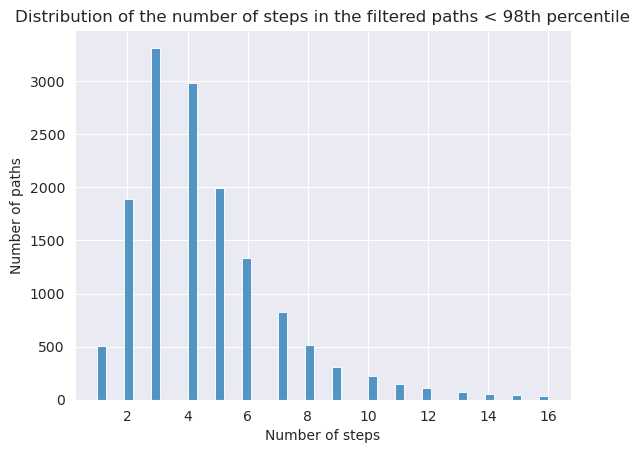

In [93]:
DATA_FOLDER = 'data/wikispeedia_paths-and-graph/'
paths_unfinished = pd.read_csv(DATA_FOLDER + 'paths_unfinished.tsv', sep='\t', skiprows=16, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])
paths_unfinished['path'] = paths_unfinished['path'].map(urllib.parse.unquote)

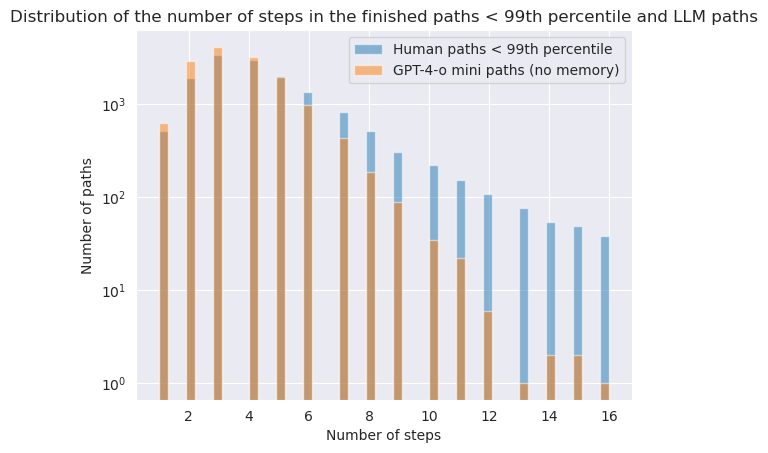

In [94]:
# for each row add a column containing the pair of the first article in the path and the target article
paths_unfinished['pair'] = paths_unfinished['path'].apply(lambda x: x.split(';')[0]) + ' -> ' + paths_unfinished['target']

print(paths_unfinished.head())

In [16]:
# create a subset of the data by taking only one ocurrence of each pair
paths_unfinished_unique = paths_unfinished.drop_duplicates(subset='pair')

print(paths_unfinished_unique.head())


    hashedIpAddress   timestamp  durationInSec  \
0  2426091a53125110  1297054935           1804   
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
3  53a53bc244e08a6a  1297094761             49   
5  131600803df4895e  1297100557           2009   

                                                path                target  \
0                                     Obi-Wan_Kenobi             Microsoft   
1                                      Julius_Caesar               Caracas   
2               Malawi;Democracy;Alexander_the_Great         First_Crusade   
3                                           Paraguay      Mount_St._Helens   
5  Agriculture;History_of_the_world;China;Yangtze...  Grand_Canal_of_China   

      type                                 pair  
0  timeout          Obi-Wan_Kenobi -> Microsoft  
1  timeout             Julius_Caesar -> Caracas  
2  timeout              Malawi -> First_Crusade  
3  restart         Paraguay ->

In [95]:
# for each row add a column containing the pair of the first article in the path and the target article
paths_finished['pair'] = paths_finished['path'].apply(lambda x: x.split(';')[0] + ' -> ' + x.split(';')[-1])

# get the paths_unfinished_unique that are not in the paths_finished_unique
mask = ~paths_unfinished_unique['pair'].isin(paths_finished['pair'])
paths_unfinished_unique_filtered = paths_unfinished_unique[mask]

print(paths_unfinished_unique_filtered.head())
# get the number of unique paths_unfinished_unique_filtered
print(paths_unfinished_unique_filtered['pair'].nunique())

# store the paths_unfinished_unique_filtered
paths_unfinished_unique_filtered.to_csv('data/paths_unfinished_unique_filtered.tsv', sep='\t', index=False)

In [96]:
# load the data/llm_paths_unfinished.tsv
llm_paths_unfinished = pd.read_csv('data/llm_on_paths_unfinished.tsv', sep='\t')

# get the number of loop_detetected
# in the path column, if the last element is LOOP_DETECTED, then it is a loop
llm_paths_unfinished['loop_detected'] = llm_paths_unfinished['path'].apply(lambda x: x.split(';')[-1] == 'LOOP_DETECTED')

# print the number of loop_detected
print("The number of loop detected ",llm_paths_unfinished['loop_detected'].sum())

# get the number of wrong_answer
# in the path column, if the last element is WRONG_ANSWER, then it is a wrong answer
llm_paths_unfinished['wrong_answer'] = llm_paths_unfinished['path'].apply(lambda x: x.split(';')[-1] == 'WRONG_ANSWER')

# print the number of wrong_answer
print("The number of wrong answer ",llm_paths_unfinished['wrong_answer'].sum())

# get the number of paths that goes to a link with dead end
# in the path column, if the last element is NO_LINK, then it is a dead end
llm_paths_unfinished['no_link'] = llm_paths_unfinished['path'].apply(lambda x: x.split(';')[-1] == 'NO_LINK')

# print the number of no_link
print("The number of dead end ",llm_paths_unfinished['no_link'].sum())

# get the number of paths that finishes i.e. there is no LOOP_DETECTED, WRONG_ANSWER or NO_LINK
llm_paths_unfinished['finished'] = ~(llm_paths_unfinished['loop_detected'] | llm_paths_unfinished['wrong_answer'] | llm_paths_unfinished['no_link'])


# print the number of finished paths
print("The number of finished paths ",llm_paths_unfinished['finished'].sum())

# print the percentage of each
print("Percentage of loop detected ",llm_paths_unfinished['loop_detected'].sum() / len(llm_paths_unfinished))
print("Percentage of wrong answer ",llm_paths_unfinished['wrong_answer'].sum() / len(llm_paths_unfinished))
print("Percentage of dead end ",llm_paths_unfinished['no_link'].sum() / len(llm_paths_unfinished))
print("Percentage of finished paths ",llm_paths_unfinished['finished'].sum() / len(llm_paths_unfinished))

labels = 'Loop detected', 'Wrong answer', 'Dead end', 'Finished'
sizes = [llm_paths_unfinished['loop_detected'].sum(), llm_paths_unfinished['wrong_answer'].sum(), llm_paths_unfinished['no_link'].sum(), llm_paths_unfinished['finished'].sum()]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Outcome of the paths generated by LLM on unfinished paths by humans')


    hashedIpAddress   timestamp  durationInSec  \
0  2426091a53125110  1297054935           1804   
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
3  53a53bc244e08a6a  1297094761             49   
4  53a53bc244e08a6a  1297099105           1808   

                                   path            target     type  \
0                        Obi-Wan_Kenobi         Microsoft  timeout   
1                         Julius_Caesar           Caracas  timeout   
2  Malawi;Democracy;Alexander_the_Great     First_Crusade  timeout   
3                              Paraguay  Mount_St._Helens  restart   
4                      Paraguay;Bolivia  Mount_St._Helens  timeout   

                           pair  
0   Obi-Wan_Kenobi -> Microsoft  
1      Julius_Caesar -> Caracas  
2       Malawi -> First_Crusade  
3  Paraguay -> Mount_St._Helens  
4  Paraguay -> Mount_St._Helens  


In [97]:
# filter out the rows with 0 steps
llm_paths_unfinished = llm_paths_unfinished[llm_paths_unfinished['steps'] > 0]
# describe the data
llm_paths_unfinished['steps'].describe()

    hashedIpAddress   timestamp  durationInSec  \
0  2426091a53125110  1297054935           1804   
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
3  53a53bc244e08a6a  1297094761             49   
5  131600803df4895e  1297100557           2009   

                                                path                target  \
0                                     Obi-Wan_Kenobi             Microsoft   
1                                      Julius_Caesar               Caracas   
2               Malawi;Democracy;Alexander_the_Great         First_Crusade   
3                                           Paraguay      Mount_St._Helens   
5  Agriculture;History_of_the_world;China;Yangtze...  Grand_Canal_of_China   

      type                                 pair  
0  timeout          Obi-Wan_Kenobi -> Microsoft  
1  timeout             Julius_Caesar -> Caracas  
2  timeout              Malawi -> First_Crusade  
3  restart         Paraguay ->

In [98]:
llm_paths_unfinished['steps'].hist(bins=50, alpha=0.5, label='Paths unfinished by humans')
llm_paths_all_gpt4omini_no_memory['path_length'].hist(bins=50, alpha=0.5, label='Paths finished by humans')
plt.title('Distribution of the number of steps made by GPT4-o mini')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.legend()
plt.yscale('log')
plt.show()

    hashedIpAddress   timestamp  durationInSec  \
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
5  131600803df4895e  1297100557           2009   
6  486bb79910fe9dd2  1297101660           1932   
7  6d136e371e42474f  1297102070            175   

                                                path                target  \
1                                      Julius_Caesar               Caracas   
2               Malawi;Democracy;Alexander_the_Great         First_Crusade   
5  Agriculture;History_of_the_world;China;Yangtze...  Grand_Canal_of_China   
6  Mind;Christianity;Europe;Renaissance;Ancient_G...              Scouting   
7    4-2-0;United_States;Agriculture;Sugar;Australia             Cane_Toad   

      type                                 pair  
1  timeout             Julius_Caesar -> Caracas  
2  timeout              Malawi -> First_Crusade  
5  timeout  Agriculture -> Grand_Canal_of_China  
6  timeout                    

3. What is the distribution of the categories of articles passed by the llm or by the human?

In [100]:
# get the articles that llm goes to
llm_paths_all_gpt4omini_no_memory = pd.read_csv('data/llm_paths_all_gpt4omini_no_memory.tsv', sep='\t')

print("The number of paths ",len(llm_paths_all_gpt4omini_no_memory))
# get the articles that human goes to
articles_llm = llm_paths_all_gpt4omini_no_memory['path'].apply(lambda x: x.split(';')).tolist()

# ignore the "<" articles in the path
articles_llm = [[item for item in sublist if item[0] != '<'] for sublist in articles_llm]

# get the categories of the articles
file_path = "data/wikispeedia_paths-and-graph/categories.tsv"
categories = pd.read_csv(file_path, sep='\t', skiprows=12, names=['article', 'category'])
categories = categories.map(urllib.parse.unquote)

articles_llm = [item for sublist in articles_llm for item in sublist]
# get the categories of the articles
categories_of_articles_llm = []
for article in articles_llm:
    try:
        categories_of_articles_llm.append(categories[categories['article'] == article]['category'])
    except:
        pass


# using the value counts, get the 0.70 quantile of the categories
categories_of_articles_llm = [item for sublist in categories_of_articles_llm for item in sublist]
categories_count_llm = pd.Series(categories_of_articles_llm).value_counts()

# print the 5 most common categories
print(categories_count_llm.head())
nbr = categories_count_llm.quantile(0.70)

count    426.000000
mean       5.661972
std        3.545776
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       25.000000
Name: steps, dtype: float64

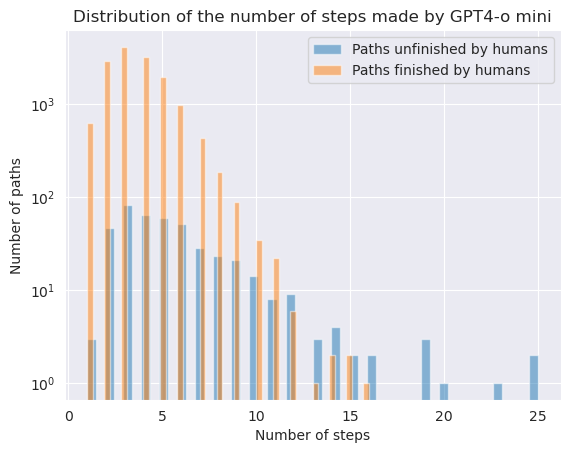

In [101]:
# plot the distribution of the 70th quantile
categories_count_llm[categories_count_llm > nbr].plot(kind='barh')
plt.title('Distribution of the 70th quantile of the categories of the articles visited by LLM')
plt.ylabel('Number of articles')
plt.xlabel('Categories')
plt.yticks(fontsize=8)
plt.show()

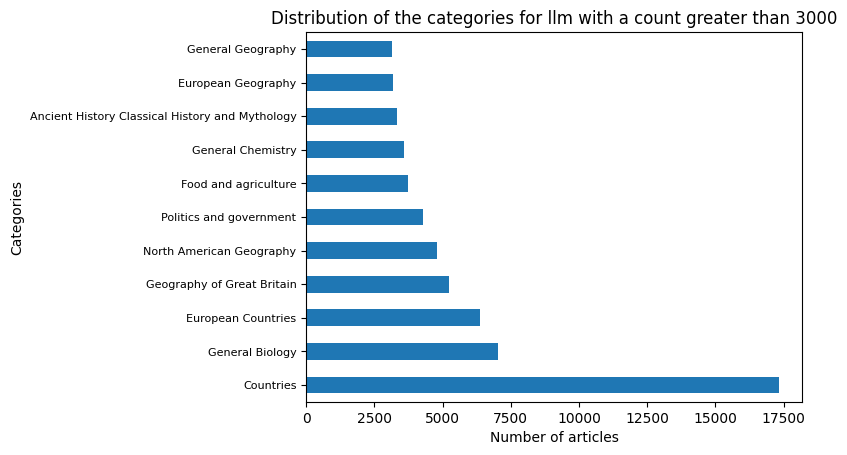

In [ ]:
# make the category names more readable
categories_count_llm.index = categories_count_llm.index.str.split('.').map(lambda x: x[-1]).str.replace('_', ' ')
# plot the distribution of the categories with a count greater than 3000
categories_count_llm[categories_count_llm > 3000].plot(kind='barh')
plt.title('Distribution of the categories for llm with a count greater than 3000')
plt.ylabel('Categories')
plt.xlabel('Number of articles')
plt.yticks(fontsize=8)
plt.show()

In [102]:
# get the articles that human goes to
articles_human = paths_finished['path'].apply(lambda x: x.split(';')).tolist()

# ignore the "<" articles in the path
articles_human = [[item for item in sublist if item[0] != '<'] for sublist in articles_human]

print("The number of paths ",len(paths_finished))

articles_human = [item for sublist in articles_human for item in sublist]
# get the cartegoies of the articles
categories_of_articles_human = []
for article in articles_human:
    try:
        categories_of_articles_human.append(categories[categories['article'] == article]['category'])
    except:
        pass


# using the value counts, get the 0.70 quantile of the categories
categories_of_articles_human = [item for sublist in categories_of_articles_human for item in sublist]
categories_count_human = pd.Series(categories_of_articles_human).value_counts()

# print the 5 most common categories
print(categories_count_human.head())
nbr_h = categories_count_human.quantile(0.70)

The number of paths  28718
subject.Countries                                          17316
subject.Science.Biology.General_Biology                     7016
subject.Geography.European_Geography.European_Countries     6374
subject.Geography.Geography_of_Great_Britain                5235
subject.Geography.North_American_Geography                  4791
Name: count, dtype: int64


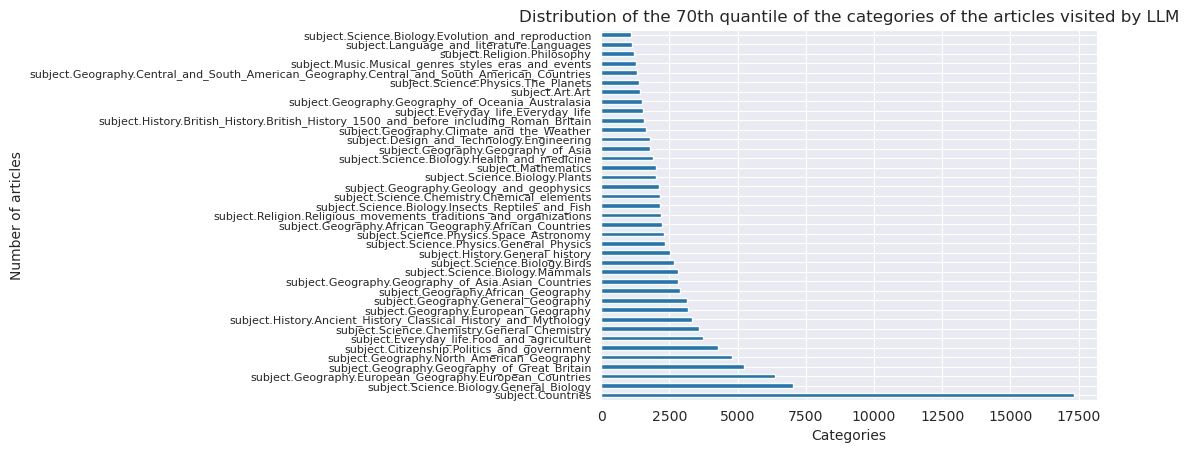

In [103]:
# plot the distribution of the 70th quantile
categories_count_human[categories_count_human > nbr_h].plot(kind='barh')
plt.title('Distribution of the 70th quantile of the categories of the articles visited by human')
plt.ylabel('Number of articles')
plt.xlabel('Categories')
plt.yticks(fontsize=8)
plt.show()

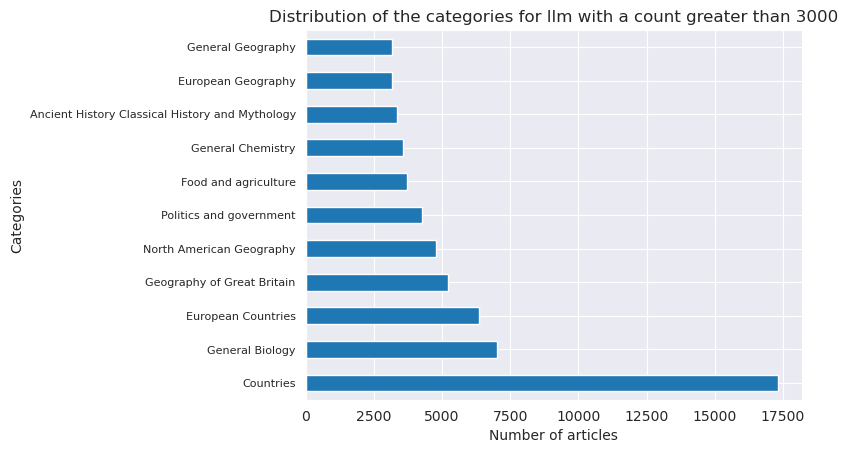

In [104]:
# make the category names more readable
categories_count_human.index = categories_count_human.index.str.split('.').map(lambda x: x[-1]).str.replace('_', ' ')
# plot the distribution of the categories with a count greater than 3000
categories_count_human[categories_count_human > 3000].plot(kind='barh')
plt.title('Distribution of the categories for human with a count greater than 3000')
plt.ylabel('Categories')
plt.xlabel('Number of articles')
plt.yticks(fontsize=8)
plt.show()

4. What is the distribution of the articles passed by the llm or by the human?

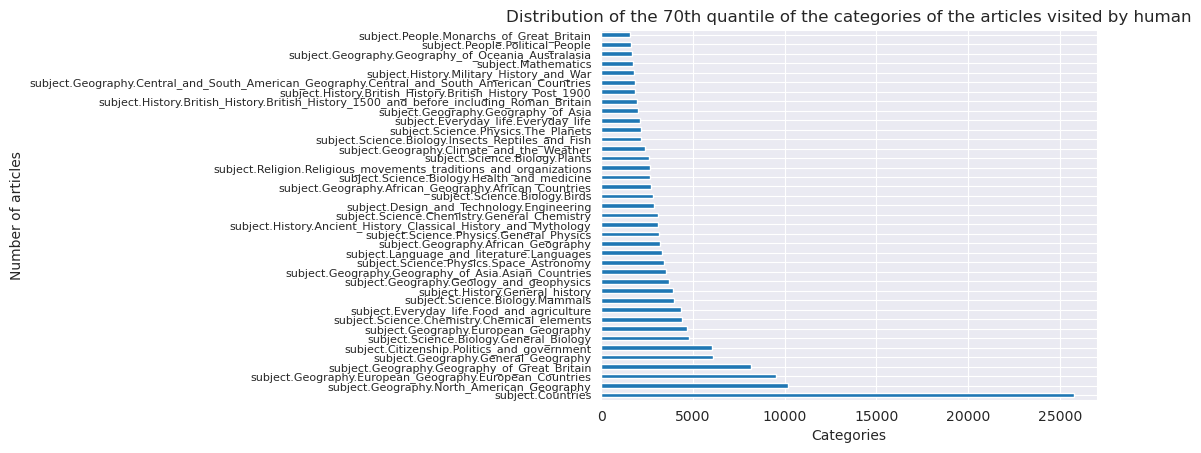

In [106]:

# Plot the distribution of the most common articles
articles_count_h = pd.Series(articles_human)
articles_count_h = articles_count_h.value_counts()
articles_count_h = articles_count_h.sort_values(ascending=False)
articles_count_h = articles_count_h[:10]
articles_count_h.plot(kind='bar')
plt.title('Distribution of the most common articles for human paths')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.show()


# from articles_llm, drop the loop_detected, wrong_answer and no_link
articles_llm = [item for item in articles_llm if item not in ['LOOP_DETECTED', 'WRONG_ANSWER', 'NO_LINK']]


# Plot the distribution of the most common articles
articles_count = pd.Series(articles_llm)
articles_count = articles_count.value_counts()
articles_count = articles_count.sort_values(ascending=False)
articles_count = articles_count[:10]
articles_count.plot(kind='bar', color='orange')
plt.title('Distribution of the most common articles for the LLM paths')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.show()



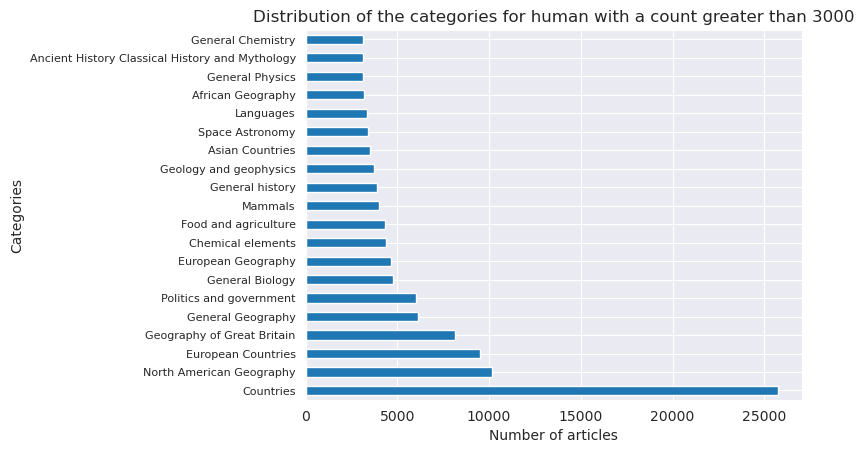

In [107]:
# plot a comparison of the 10 most common articles of the llm and the human
print(articles_count_h)
print(articles_count)

print("the number of articles passes from human", articles_count_h.sum())
print(articles_count.sum())

articles_count_h.plot(kind='bar', alpha=0.5, color = 'blue', label='Human')
articles_count.plot(kind='bar', alpha=0.5, color = 'orange', label='LLM')
plt.title('Comparison of the 5 most common articles of the llm and the human')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Some info about the outgoing and incoming links of the two most common articles.

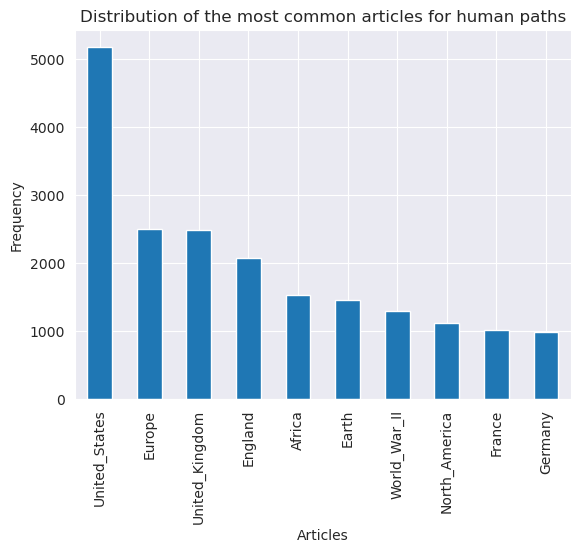

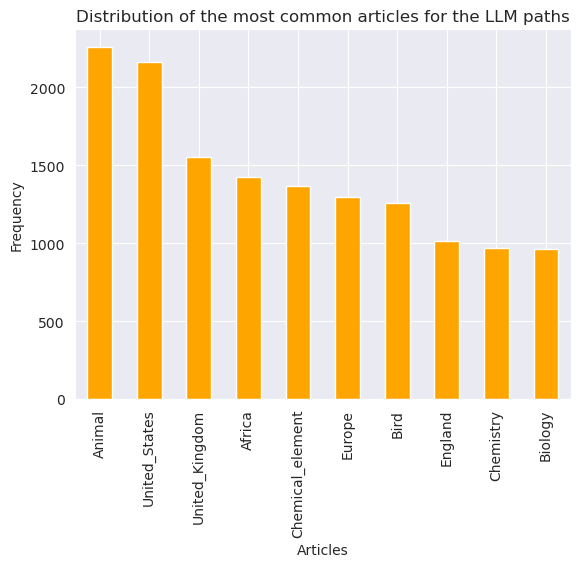

In [108]:
links = pd.read_csv('data/wikispeedia_paths-and-graph/links.tsv', sep='\t', skiprows=12, names=['article', 'link'])
# group all links by their origin article
links = links.groupby('article')['link'].apply(list).reset_index(name='links')
links['outgoing_number']=links['links'].apply(lambda x: len(x))
print("The number of outgoing articles from the article 'United States':", links[links['article'] == 'United_States']['outgoing_number'].values[0])

United_States     5163
Europe            2502
United_Kingdom    2489
England           2073
Africa            1537
Earth             1456
World_War_II      1305
North_America     1128
France            1026
Germany            990
Name: count, dtype: int64
Animal              2259
United_States       2161
United_Kingdom      1553
Africa              1427
Chemical_element    1368
Europe              1295
Bird                1257
England             1013
Chemistry            968
Biology              966
Name: count, dtype: int64
the number of articles passes from human 19669
14267


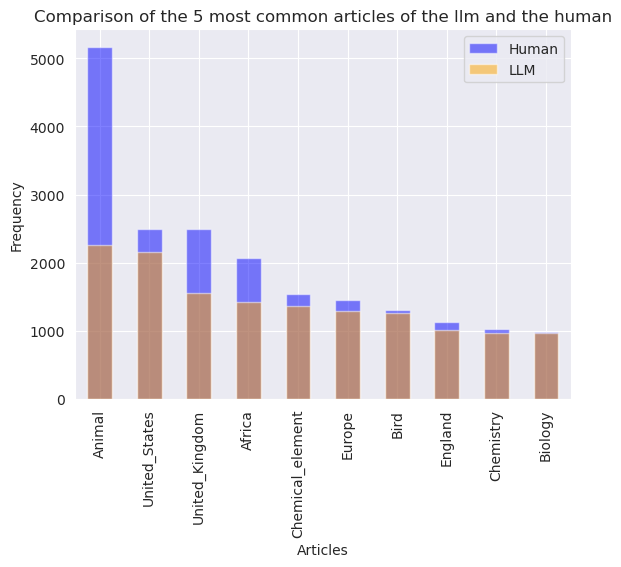

In [109]:
print("The number of outgoing articles from the article 'Animal':", links[links['article'] == 'Animal']['outgoing_number'].values[0])

In [ ]:
# get the number of incoming links for each article
# create a list of all articles that are linked to the article
incoming_links = []
for index, row in links.iterrows():
    for link in row['links']:
        incoming_links.append(link)
incoming_links = pd.Series(incoming_links)

incoming_links = incoming_links.value_counts()
incoming_links = incoming_links.reset_index()
incoming_links.columns = ['article', 'incoming_number']
print("The number of incoming articles to the article 'United States':", incoming_links[incoming_links['article'] == 'United_States']['incoming_number'].values[0])

The number of incoming articles to the article 'United States': 1551


In [110]:
print("The number of incoming articles to the article 'Animal':", incoming_links[incoming_links['article'] == 'Animal']['incoming_number'].values[0])

The number of outgoing articles from the article 'United States': 294


# Paths with memory 

Does the llm take on average more steps than the human?

In [113]:
# load the data data/llm_paths_all_gpt4omini_memory.tsv
llm_paths_all_gpt4omini_memory = pd.read_csv('data/llm_paths_all_gpt4omini_memory.tsv', sep='\t')

# filter out the rows with 0 steps
llm_paths_all_gpt4omini_memory = llm_paths_all_gpt4omini_memory[llm_paths_all_gpt4omini_memory['steps'] > 0]
# describe the data
llm_paths_all_gpt4omini_memory['steps'].describe()

The number of incoming articles to the article 'Animal': 492


In [48]:
# load the data data/paths_finished_unique.tsv
paths_finished = pd.read_csv('data/paths_finished_unique.tsv', sep='\t')

# get the number of steps in the finished paths
paths_finished['path_length'] = paths_finished['path'].apply(lambda x: len(x.split(';')) - 1)
paths_finished['path_length'].describe()

count    28718.000000
mean         5.672749
std          5.017178
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        434.000000
Name: path_length, dtype: float64

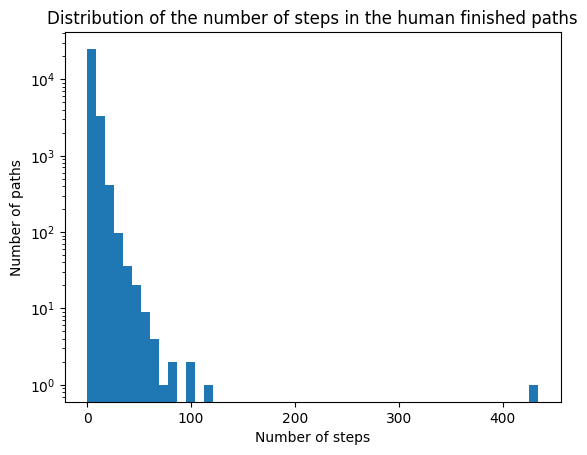

In [49]:
# plot the distribution of the number of steps in the finished paths
llm_paths_all_gpt4omini_memory['path_length'] = llm_paths_all_gpt4omini_memory['path'].apply(lambda x: len(x.split(';')) - 1)
paths_finished['path_length'].hist(bins=50)
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.title('Distribution of the number of steps in the human finished paths')
plt.grid(False)
plt.yscale('log')


In [114]:
llm_paths_all_gpt4omini_memory['path_length'].hist(color='orange', bins=50)
plt.xlim(0, paths_finished['path_length'].max())
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.title('Distribution of the number of steps in the paths \n finished by LLM GPT-4-o mini (memory)')
plt.grid(False)
plt.yscale('log')

count    7552.000000
mean        6.983316
std         4.778942
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        57.000000
Name: steps, dtype: float64

In [115]:
# take only the path_id that are in the 2 datasets
# create a mask using the past_id column
mask = paths_finished['path_id'].isin(llm_paths_all_gpt4omini_memory['path_id'])
paths_finished_filtered = paths_finished[mask]


# get the number of steps in the filtered paths
paths_finished_filtered['path_length'] = paths_finished_filtered['path'].apply(lambda x: len(x.split(';')) - 1)
paths_finished_filtered['path_length'].describe()


FileNotFoundError: [Errno 2] No such file or directory: 'E:/../../paths_finished_unique.tsv'

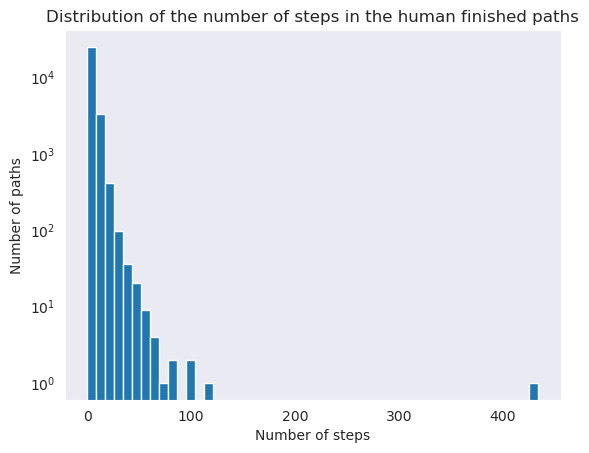

In [116]:
# plot the distribution of the number of steps in the filtered paths
sns.histplot(paths_finished_filtered['path_length'], bins=50)
plt.title('Distribution of the number of steps in the human finished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.yscale('log')

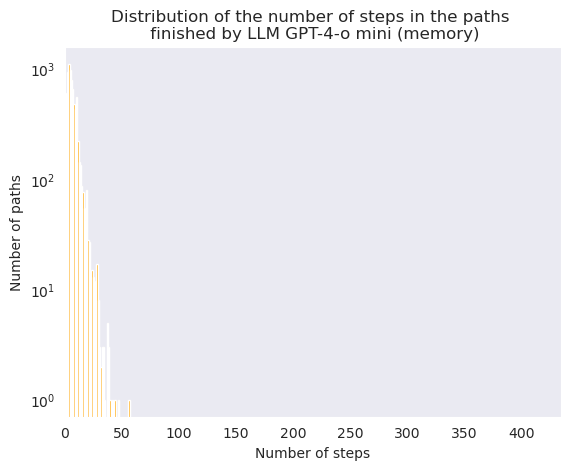

In [117]:
# get the 99th percentile of the number of steps in the llm paths with memory
percentile_99 = np.percentile(llm_paths_all_gpt4omini_memory['path_length'], 99)

# plot the distribution of the number of steps in the llm paths that are less than the 90th percentile
llm_paths_all_gpt4omini_memory_lt_99 = llm_paths_all_gpt4omini_memory[llm_paths_all_gpt4omini_memory['path_length'] < percentile_99]
sns.histplot(llm_paths_all_gpt4omini_memory_lt_99['path_length'], bins=50)
plt.title('Distribution of the number of steps in the llm paths < 99th percentile')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

In [118]:
# compare the distribution of the number of steps in the finished paths filtered 99 percentile and the LLM paths filtered 90 percentile
paths_finished_filtered_lt_99['path_length'].hist(bins=50, alpha=0.5, label='Human paths')
llm_paths_all_gpt4omini_memory_lt_99['path_length'].hist(bins=50, alpha=0.5, label='GPT-4-o mini paths (memory)')
plt.title('Distribution of the number of steps in the human finished paths and LLM paths < 99th percentile')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.legend()
plt.yscale('log')
plt.show()

/tmp/ipykernel_49010/840973761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_filtered['path_length'] = paths_finished_filtered['path'].apply(lambda x: len(x.split(';')) - 1)


count    7552.000000
mean        5.566870
std         6.244099
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max       434.000000
Name: path_length, dtype: float64

What is the distribution of the categories of articles passed by the llm or by the human?

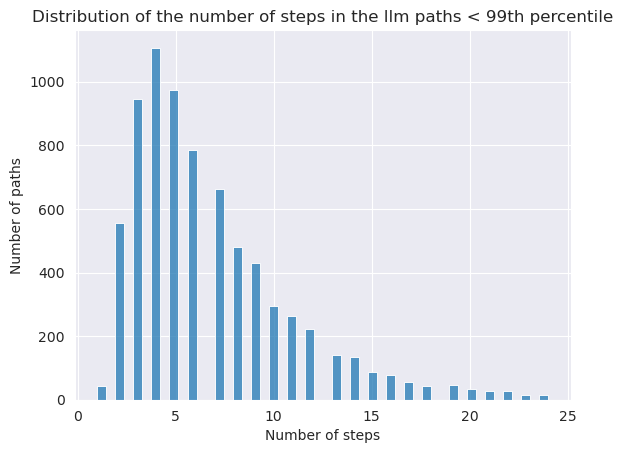

In [120]:
# get the articles that llm goes to
llm_paths_all_gpt4omini_memory = pd.read_csv('data/llm_paths_all_gpt4omini_memory.tsv', sep='\t')

print("The number of paths ",len(llm_paths_all_gpt4omini_memory))
# get the articles that human goes to
articles_llm = llm_paths_all_gpt4omini_memory['path'].apply(lambda x: x.split(';')).tolist()

# ignore the "<" articles in the path
articles_llm = [[item for item in sublist if item[0] != '<'] for sublist in articles_llm]

# get the categories of the articles
file_path = "data/wikispeedia_paths-and-graph/categories.tsv"
categories = pd.read_csv(file_path, sep='\t', skiprows=12, names=['article', 'category'])
categories = categories.map(urllib.parse.unquote)

articles_llm = [item for sublist in articles_llm for item in sublist]
# get the categories of the articles
categories_of_articles_llm = []
for article in articles_llm:
    try:
        categories_of_articles_llm.append(categories[categories['article'] == article]['category'])
    except:
        pass


# using the value counts, get the 0.70 quantile of the categories
categories_of_articles_llm = [item for sublist in categories_of_articles_llm for item in sublist]
categories_count_llm = pd.Series(categories_of_articles_llm).value_counts()

# print the 5 most common categories
print(categories_count_llm.head())
nbr = categories_count_llm.quantile(0.70)

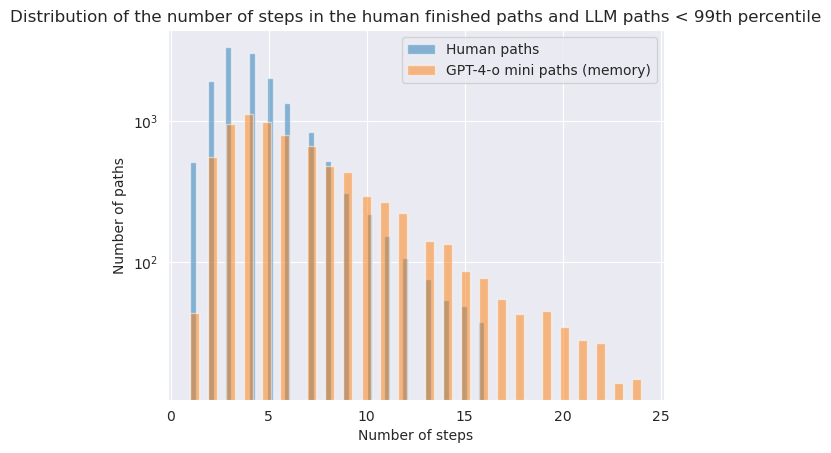

In [121]:
# plot the distribution of the 70th quantile
categories_count_llm[categories_count_llm > nbr].plot(kind='barh')
plt.title('Distribution of the 70th quantile of the categories of the articles visited by LLM')
plt.ylabel('Number of articles')
plt.xlabel('Categories')
plt.yticks(fontsize=8)
plt.show()

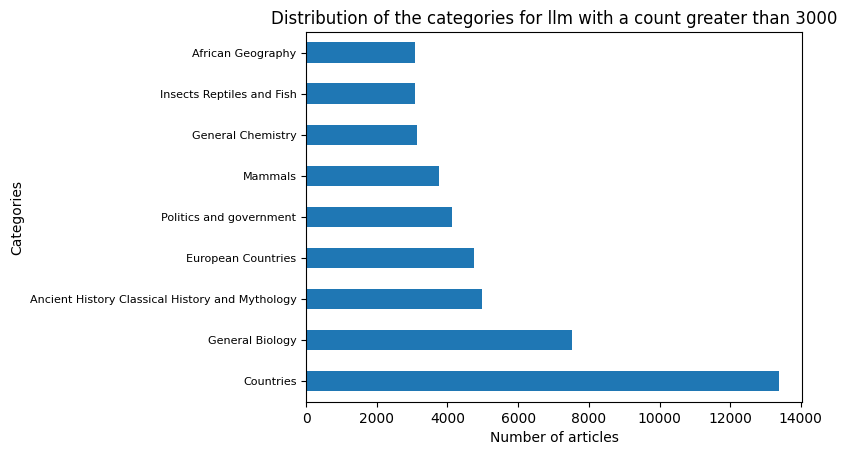

In [ ]:
# make the category names more readable
categories_count_llm.index = categories_count_llm.index.str.split('.').map(lambda x: x[-1]).str.replace('_', ' ')
# plot the distribution of the categories with a count greater than 3000
categories_count_llm[categories_count_llm > 3000].plot(kind='barh')
plt.title('Distribution of the categories for llm with a count greater than 3000')
plt.ylabel('Categories')
plt.xlabel('Number of articles')
plt.yticks(fontsize=8)
plt.show()

In [122]:
# get the articles that human goes to
articles_human = paths_finished['path'].apply(lambda x: x.split(';')).tolist()

# ignore the "<" articles in the path
articles_human = [[item for item in sublist if item[0] != '<'] for sublist in articles_human]

print("The number of paths ",len(paths_finished))

articles_human = [item for sublist in articles_human for item in sublist]
# get the cartegoies of the articles
categories_of_articles_human = []
for article in articles_human:
    try:
        categories_of_articles_human.append(categories[categories['article'] == article]['category'])
    except:
        pass


# using the value counts, get the 0.70 quantile of the categories
categories_of_articles_human = [item for sublist in categories_of_articles_human for item in sublist]
categories_count_human = pd.Series(categories_of_articles_human).value_counts()

# print the 5 most common categories
print(categories_count_human.head())
nbr_h = categories_count_human.quantile(0.70)

The number of paths  13410
subject.Countries                                                  13368
subject.Science.Biology.General_Biology                             7519
subject.History.Ancient_History_Classical_History_and_Mythology     4973
subject.Geography.European_Geography.European_Countries             4754
subject.Citizenship.Politics_and_government                         4139
Name: count, dtype: int64


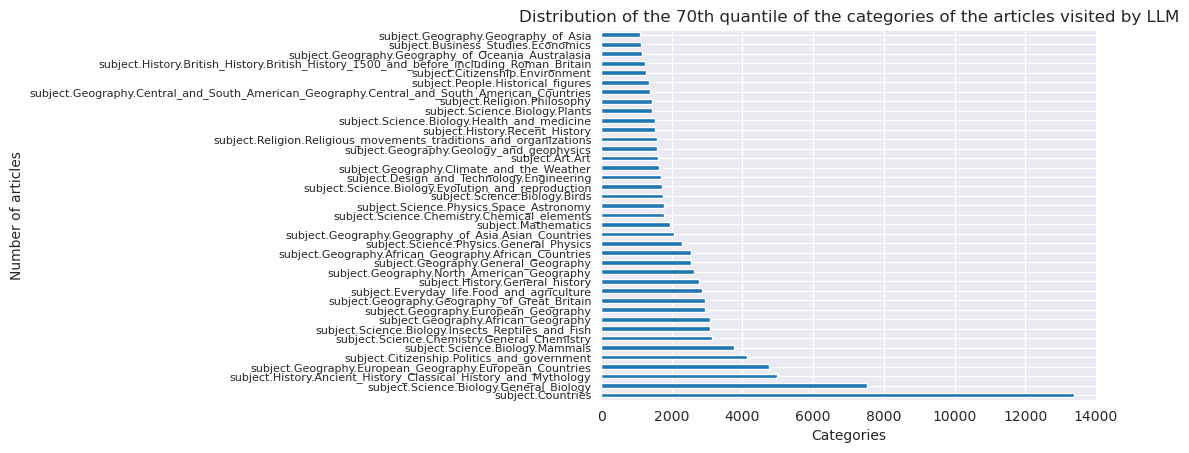

In [123]:
# plot the distribution of the 70th quantile
categories_count_human[categories_count_human > nbr_h].plot(kind='barh')
plt.title('Distribution of the 70th quantile of the categories of the articles visited by human')
plt.ylabel('Number of articles')
plt.xlabel('Categories')
plt.yticks(fontsize=8)
plt.show()

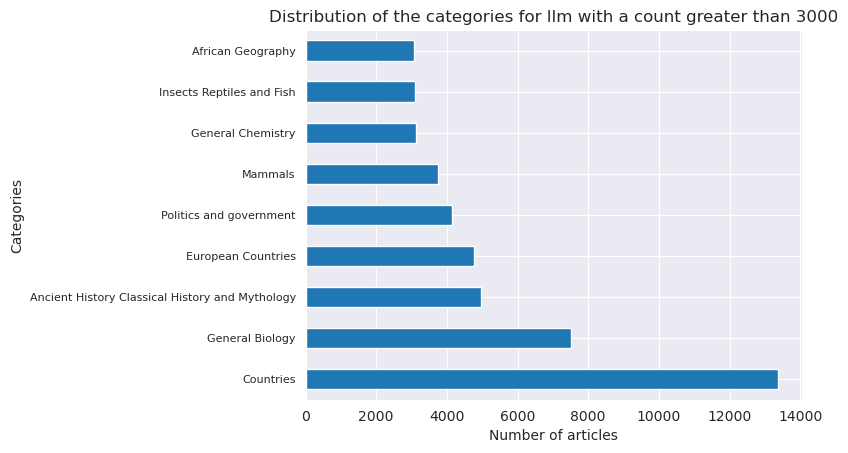

In [124]:
# make the category names more readable
categories_count_human.index = categories_count_human.index.str.split('.').map(lambda x: x[-1]).str.replace('_', ' ')
# plot the distribution of the categories with a count greater than 3000
categories_count_human[categories_count_human > 3000].plot(kind='barh')
plt.title('Distribution of the categories for human with a count greater than 3000')
plt.ylabel('Categories')
plt.xlabel('Number of articles')
plt.yticks(fontsize=8)
plt.show()

Now we compare the articles passed by the llm and the human. Does the llm pass more articles than the human?

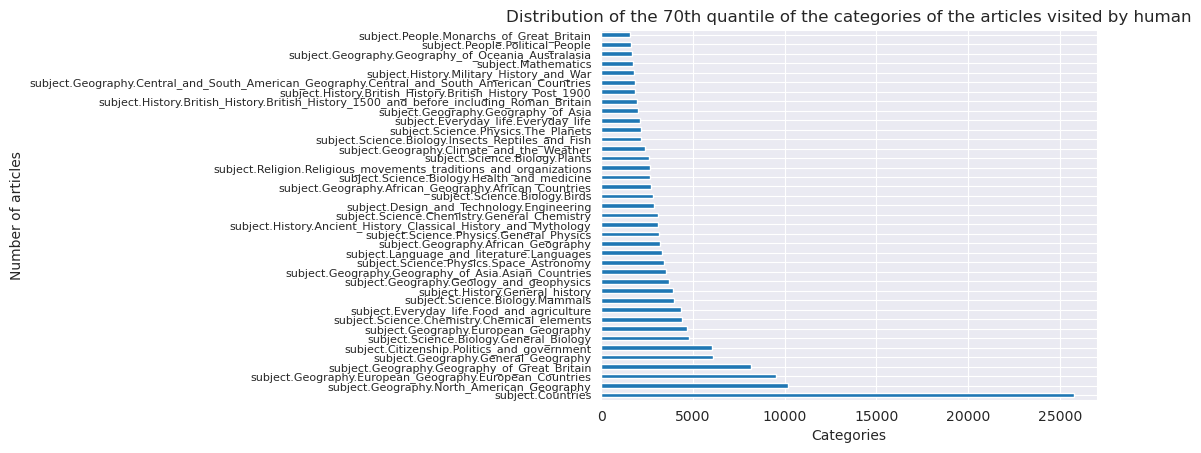

In [126]:

# Plot the distribution of the most common articles
articles_count_h = pd.Series(articles_human)
articles_count_h = articles_count_h.value_counts()
articles_count_h = articles_count_h.sort_values(ascending=False)
articles_count_h = articles_count_h[:10]
articles_count_h.plot(kind='bar')
plt.title('Distribution of the most common articles for human paths')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.show()


# from articles_llm, drop the loop_detected, wrong_answer and no_link
articles_llm = [item for item in articles_llm if item not in ['LOOP_DETECTED', 'WRONG_ANSWER', 'NO_LINK']]


# Plot the distribution of the most common articles
articles_count = pd.Series(articles_llm)
articles_count = articles_count.value_counts()
articles_count = articles_count.sort_values(ascending=False)
articles_count = articles_count[:10]
articles_count.plot(kind='bar', color='orange')
plt.title('Distribution of the most common articles for the LLM paths')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.show()



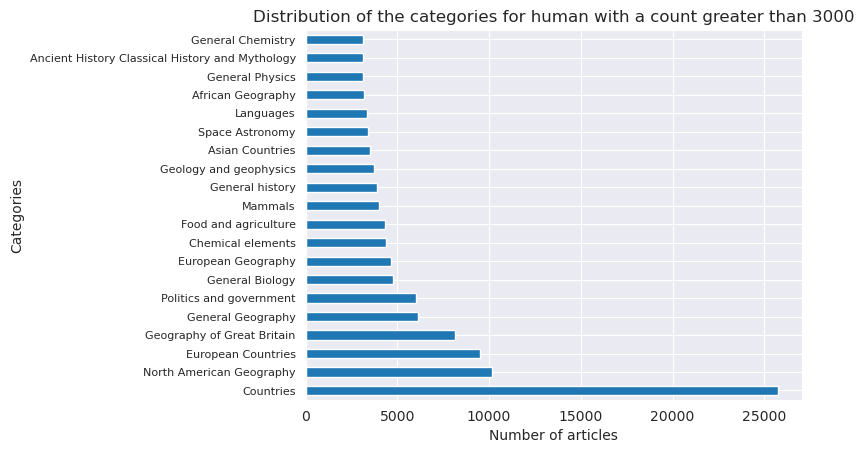

In [127]:
# plot a comparison of the 10 most common articles of the llm and the human
print(articles_count_h)
print(articles_count)

print("the number of articles passes from human", articles_count_h.sum())
print(articles_count.sum())


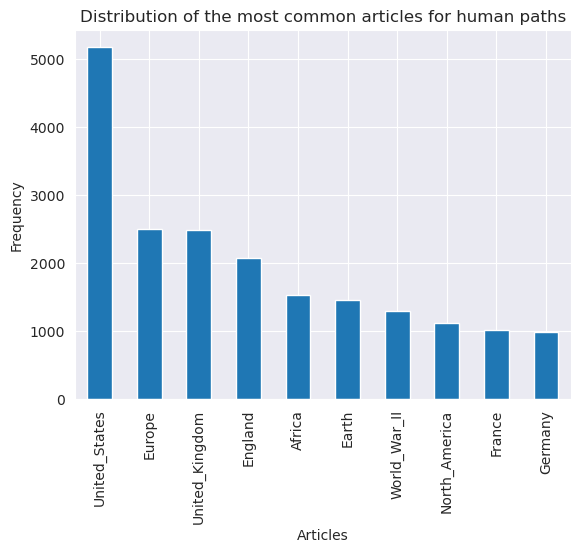

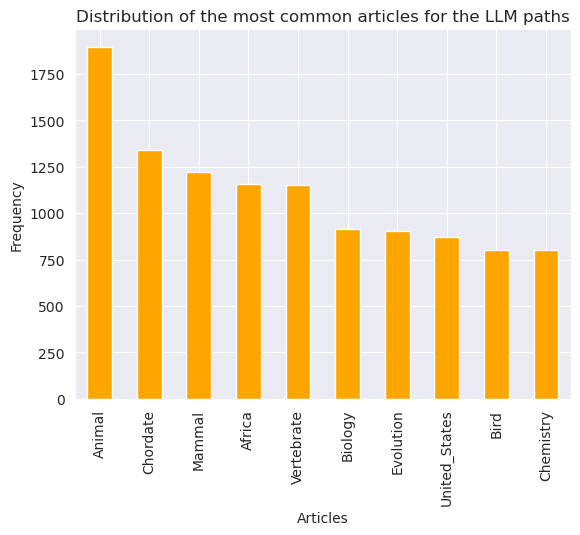

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# plot a comparison of the 10 most common articles of the llm and the human
print(articles_count_h)
print(articles_count)

print("the number of articles passes from human", articles_count_h.sum())
print(articles_count.sum())


United_States     5163
Europe            2502
United_Kingdom    2489
England           2073
Africa            1537
Earth             1456
World_War_II      1305
North_America     1128
France            1026
Germany            990
Name: count, dtype: int64
Animal           1893
Chordate         1338
Mammal           1218
Africa           1158
Vertebrate       1149
Biology           914
Evolution         906
United_States     870
Bird              803
Chemistry         802
Name: count, dtype: int64
the number of articles passes from human 19669
11051
